In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
def display_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show(block = True)

In [3]:
def display_graph(image, i = 0):
    sum_ = image.sum(axis = i)
    
    plt.figure(figsize = (15, 8))
    x = list(range(len(sum_)))
    y = list(sum_)
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

### Load

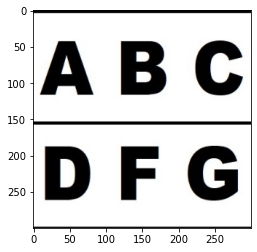

In [5]:
image = cv.imread("6.jpg")
image = cv.resize(image, (300, 300))
display_image(image)

### Gray

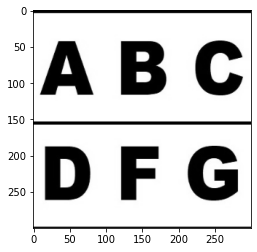

In [6]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
display_image(gray)

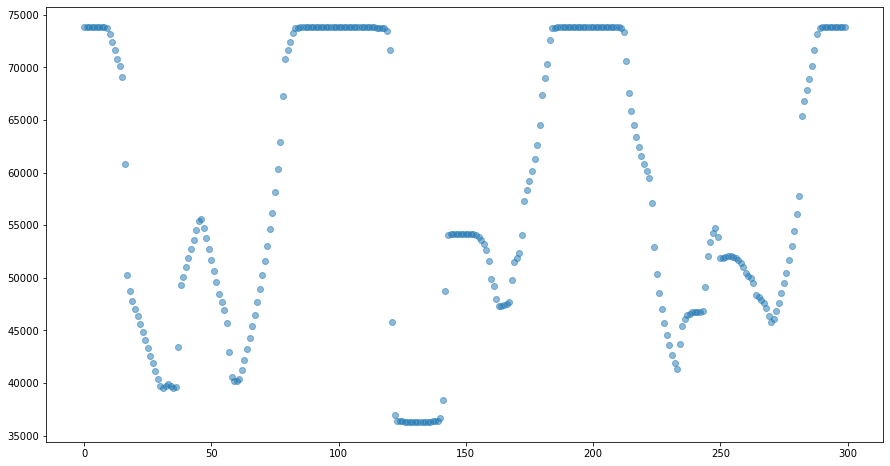

In [9]:
display_graph(gray)

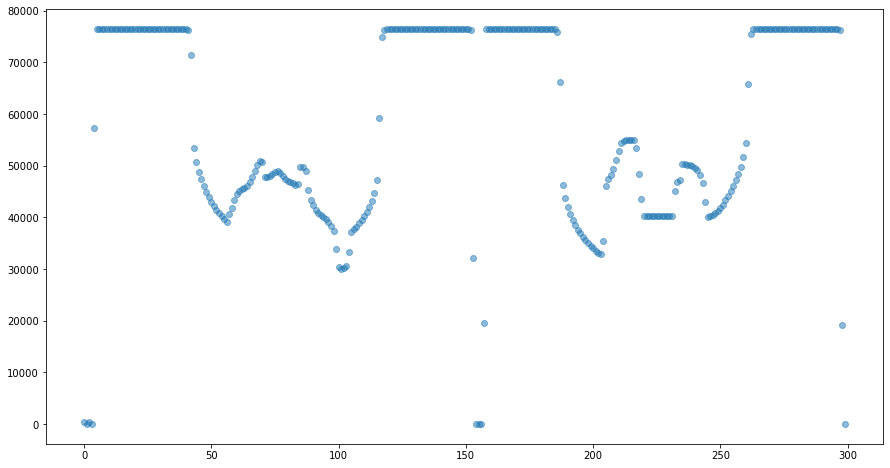

In [10]:
display_graph(gray, i = 1)

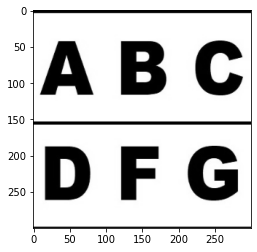

In [11]:
display_image(gray)

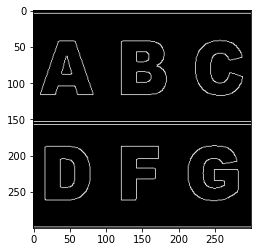

In [12]:
edges = cv.Canny(gray, 0, 125, apertureSize = 3)
display_image(edges)

In [13]:
def model1(edges):
    lines = cv.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength = 100, maxLineGap = 10)

    Y = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(image, (x1, y1), (x2, y2), (0,255,0), 2)
        Y.append(y1)
    Y = sorted(Y)
    display_image(image)
    
    return Y

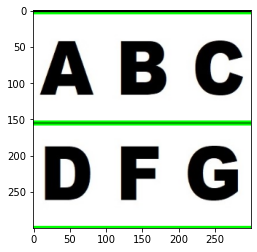

In [14]:
Y = model1(edges)

0


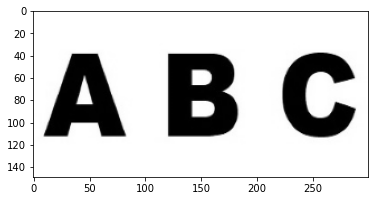

2


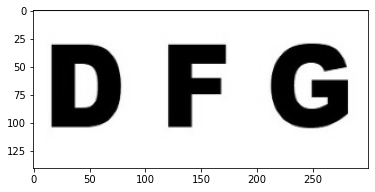

In [15]:
for i in range(0, len(Y), 2):
    print(i)
    display_image(gray[Y[i] : Y[i + 1], :])